# Setup

In [1]:
import numpy as np
import os
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
import tensorflow as tf

In [3]:
x = tf.Variable(3,name='x')
y = tf.Variable(4,name='y')
f = x*x*y +y +2

In [4]:
f


<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [5]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [6]:
sess.close()

In [7]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [8]:
result

42

In [10]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
    

In [11]:
result

42

In [12]:
init = tf.global_variables_initializer()

In [13]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

42


In [14]:
sess.close()


In [15]:
result

42

# Managing graphs

In [16]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [17]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
x2.graph is graph

True

In [19]:
x2.graph is tf.get_default_graph()

False

In [21]:
w = tf.constant(3)
x = w +2
y = x +5
z = x *3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


In [22]:
with tf.Session() as sess:
    y_val,z_val = sess.run([y,z])
    print(y_val,z_val,sep='\n')

10
15


# Basic RNNs

In [4]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32,shape=[None,n_inputs])
X1 = tf.placeholder(tf.float32,shape=[None,n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs,n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1,n_neurons],dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0,Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0,Wy) + tf.matmul(X1,Wx) + b )

init = tf.global_variables_initializer()


In [5]:
X0_batch = np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

with tf.Session() as sess:
    init.run()
    Y0_val,Y1_val = sess.run([Y0,Y1],feed_dict={X0:X0_batch,X1:X1_batch})

In [6]:
print(Y0_val)

[[-0.0664006   0.96257669  0.68105793  0.70918542 -0.89821601]
 [ 0.9977755  -0.71978903 -0.99657607  0.96739239 -0.99989718]
 [ 0.99999774 -0.99898803 -0.99999893  0.99677622 -0.99999988]
 [ 1.         -1.         -1.         -0.99818915  0.99950868]]


In [7]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200251 -0.99999982]
 [-0.12210421  0.62805271  0.96718431 -0.99371219 -0.25839362]
 [ 0.99999827 -0.9999994  -0.9999975  -0.85943311 -0.99998808]
 [ 0.99928284 -0.99999815 -0.99990582  0.98579627 -0.92205757]]


# Using static_rnn()


In [8]:
n_inputs = 3
n_neurons = 5

In [9]:
reset_graph()

X0 = tf.placeholder(tf.float32,[None,n_inputs])
X1 = tf.placeholder(tf.float32,[None,n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell,[X0,X1],dtype=tf.float32)

Y0,Y1 = output_seqs

In [10]:
init = tf.global_variables_initializer()


In [11]:

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [12]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.65428472, -0.93850589,  0.52089024],
       [ 0.99122757, -0.95425421, -0.75180793, -0.99952078,  0.98202348],
       [ 0.99992681, -0.99783254, -0.82473528, -0.9999963 ,  0.99947774],
       [ 0.99677098, -0.68750614,  0.84199691,  0.93039107,  0.8120684 ]], dtype=float32)

In [13]:
Y1_val

array([[ 0.99998885, -0.99976051, -0.06679298, -0.99998039,  0.99982214],
       [-0.65249437, -0.51520866, -0.37968954, -0.59225935, -0.08968385],
       [ 0.99862403, -0.99715197, -0.03308626, -0.99915648,  0.99329019],
       [ 0.99681675, -0.95981938,  0.39660636, -0.83076048,  0.79671967]], dtype=float32)

# Packing sequences

In [14]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [15]:
reset_graph()

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
X_seqs = tf.unstack(tf.transpose(X,perm=[1,0,2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs ,states = tf.contrib.rnn.static_rnn(basic_cell,X_seqs,dtype=tf.float32)

outputs = tf.transpose(tf.stack(output_seqs),perm=[1,0,2])

In [16]:
init = tf.global_variables_initializer()

In [17]:
X_batch = np.array([        
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
])

In [18]:
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X:X_batch})

In [19]:
print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.94288003 -0.99988687  0.94055814  0.99999851 -0.9999997 ]]

 [[-0.80015349 -0.99218267  0.78177971  0.9971031  -0.99646091]
  [-0.63711601  0.11300932  0.5798437   0.43105593 -0.63716984]]

 [[-0.93605185 -0.99983788  0.93088669  0.99998152 -0.99998295]
  [-0.9165386  -0.99456042  0.89605415  0.99987197 -0.99997509]]

 [[ 0.99273688 -0.99819332 -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746334 -0.73191994  0.7827872   0.95256817 -0.97817713]]]


In [20]:
print(np.transpose(outputs_val,axes=[1,0,2])[1])

[[-0.94288003 -0.99988687  0.94055814  0.99999851 -0.9999997 ]
 [-0.63711601  0.11300932  0.5798437   0.43105593 -0.63716984]
 [-0.9165386  -0.99456042  0.89605415  0.99987197 -0.99997509]
 [-0.02746334 -0.73191994  0.7827872   0.95256817 -0.97817713]]


In [23]:
outputs_val.shape

(4, 2, 5)

# Using dynamic_rnn()

In [24]:
n_inputs = 3
n_steps = 2
n_neurons = 5

In [25]:
reset_graph()

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states = tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)

In [26]:
init = tf.global_variables_initializer()


In [27]:

X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [28]:
print(outputs_val)

[[[ 0.80872238 -0.52312446 -0.6716494  -0.69762248 -0.54384488]
  [ 0.9995454   0.99339807 -0.99998379  0.99919224 -0.98379493]]

 [[ 0.99547106 -0.02155113 -0.99482894  0.17964774 -0.83173698]
  [-0.06013332  0.4030143   0.02884481 -0.29437575 -0.85681593]]

 [[ 0.99990267  0.49111056 -0.9999314   0.8413834  -0.9444679 ]
  [ 0.99406189  0.95815992 -0.99768937  0.98646194 -0.91752487]]

 [[-0.80632919  0.93928123 -0.97309881  0.99996096  0.97433066]
  [ 0.95047355 -0.51205158 -0.27763969  0.83108062  0.81631833]]]


# Setting the lengths

In [29]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [32]:
seq_length = tf.placeholder(tf.int32,[None])
outputs,states = tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32,sequence_length=seq_length)

In [33]:
init = tf.global_variables_initializer()

In [34]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [36]:
with tf.Session() as sess:
    init.run()
    outputs_val,states_val = sess.run(
    [outputs,states],feed_dict={X:X_batch,seq_length:seq_length_batch})

In [37]:
print(outputs_val)

[[[ 0.14722362 -0.32414085 -0.67188448  0.24232785  0.33905342]
  [-0.63894391 -0.94035131 -0.9993459  -0.99993545  0.93282372]]

 [[-0.095309   -0.8057248  -0.98758006 -0.88032597  0.71243948]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.32703066 -0.9556492  -0.99960214 -0.99507135  0.89191598]
  [-0.76592433 -0.69120342 -0.99023896 -0.99452507  0.85302716]]

 [[-0.98325384 -0.99936295  0.60714054 -0.99998587  0.12005932]
  [-0.91804343 -0.65524775 -0.91065848 -0.8482663  -0.12159471]]]


In [38]:
print(states_val)

[[-0.63894391 -0.94035131 -0.9993459  -0.99993545  0.93282372]
 [-0.095309   -0.8057248  -0.98758006 -0.88032597  0.71243948]
 [-0.76592433 -0.69120342 -0.99023896 -0.99452507  0.85302716]
 [-0.91804343 -0.65524775 -0.91065848 -0.8482663  -0.12159471]]


# Training a sequence classifier

In [3]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.int32,[None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states = tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)

logits = tf.layers.dense(states,n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits,y,1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()

In [7]:
outputs.shape,states.shape

(TensorShape([Dimension(None), Dimension(28), Dimension(150)]),
 TensorShape([Dimension(None), Dimension(150)]))

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:/python_work/handson_ml/datasets')
X_test = mnist.test.images.reshape((-1,n_steps,n_inputs))
y_test = mnist.test.labels

Extracting E:/python_work/handson_ml/datasets\train-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\train-labels-idx1-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-labels-idx1-ubyte.gz


In [6]:
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iter in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1,n_steps,n_inputs))
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test,y:y_test})
        print(y_batch.shape,outputs.shape)
        print(epoch,"Train accuracy:",acc_train,"Test accuracy:",acc_test)

(50,) (?, 28, 150)
0 Train accuracy: 0.96 Test accuracy: 0.9324
(50,) (?, 28, 150)
1 Train accuracy: 0.96 Test accuracy: 0.9449
(50,) (?, 28, 150)
2 Train accuracy: 0.98 Test accuracy: 0.9575
(50,) (?, 28, 150)
3 Train accuracy: 0.98 Test accuracy: 0.9566
(50,) (?, 28, 150)
4 Train accuracy: 0.98 Test accuracy: 0.961
(50,) (?, 28, 150)
5 Train accuracy: 0.94 Test accuracy: 0.9613
(50,) (?, 28, 150)
6 Train accuracy: 0.98 Test accuracy: 0.9697
(50,) (?, 28, 150)
7 Train accuracy: 0.92 Test accuracy: 0.9601
(50,) (?, 28, 150)
8 Train accuracy: 0.98 Test accuracy: 0.9573
(50,) (?, 28, 150)
9 Train accuracy: 1.0 Test accuracy: 0.9702


# Multi-layer RNN

In [8]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.int32,[None])



In [9]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
         for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs,states = tf.nn.dynamic_rnn(multi_layer_cell,X,dtype=tf.float32)

states_count = tf.concat(axis=1,values=states) ####***
logits = tf.layers.dense(states_count,n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits,y,1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()


In [13]:
outputs.shape,np.array(states).shape

(TensorShape([Dimension(None), Dimension(28), Dimension(100)]), (3,))

In [14]:
states_count.shape

TensorShape([Dimension(None), Dimension(300)])

In [45]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iter in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1,n_steps,n_inputs))
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test,y:y_test})
        print(epoch,'Train accuracy:',acc_train,'Test accuracy:',acc_test)

0 Train accuracy: 0.96 Test accuracy: 0.9275
1 Train accuracy: 1.0 Test accuracy: 0.9574
2 Train accuracy: 0.92 Test accuracy: 0.956
3 Train accuracy: 1.0 Test accuracy: 0.9713
4 Train accuracy: 1.0 Test accuracy: 0.9703
5 Train accuracy: 0.98 Test accuracy: 0.9759
6 Train accuracy: 0.96 Test accuracy: 0.9722
7 Train accuracy: 0.96 Test accuracy: 0.9743
8 Train accuracy: 1.0 Test accuracy: 0.9783
9 Train accuracy: 1.0 Test accuracy: 0.9823
10 Train accuracy: 1.0 Test accuracy: 0.981
11 Train accuracy: 1.0 Test accuracy: 0.9776
12 Train accuracy: 0.98 Test accuracy: 0.947
13 Train accuracy: 1.0 Test accuracy: 0.9805
14 Train accuracy: 0.98 Test accuracy: 0.9829
15 Train accuracy: 0.98 Test accuracy: 0.9825
16 Train accuracy: 0.96 Test accuracy: 0.9839
17 Train accuracy: 1.0 Test accuracy: 0.9785
18 Train accuracy: 1.0 Test accuracy: 0.9806
19 Train accuracy: 1.0 Test accuracy: 0.9796


# Time series

In [25]:
t_min ,t_max = 0,30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size,n_steps):
    t0 = np.random.rand(batch_size,1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0.,n_steps+1) * resolution
    ys = time_series(Ts)
    return ys[:,:-1].reshape(-1,n_steps,1),ys[:,1:].reshape(-1,n_steps,1)



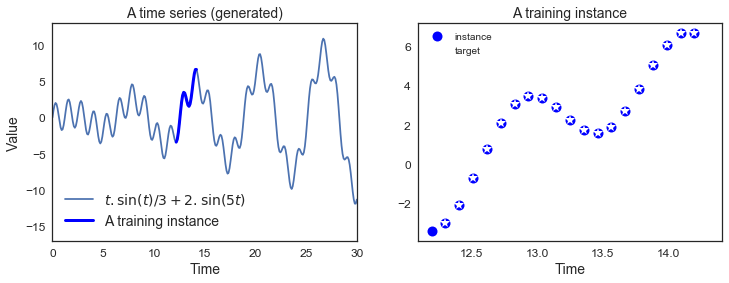

In [43]:
t = np.linspace(t_min,t_max,int((t_max-t_min)/resolution))

n_steps = 20
t_instance = np.linspace(12.2,12.2 + resolution * (n_steps + 1),n_steps +1)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('A time series (generated)',fontsize=14)
plt.plot(t,time_series(t),label=r'$t.\sin(t) / 3 + 2.\sin(5t)$')
plt.plot(t_instance[:-1],time_series(t_instance[:-1]),'b-',linewidth=3,label='A training instance')
plt.legend(loc='lower left',fontsize=14)
plt.axis([0,30,-17,13])
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(122)
plt.title('A training instance',fontsize=14)
plt.plot(t_instance[:-1],time_series(t_instance[:-1]),'bo',markersize=10,label='instance')
plt.plot(t_instance[1:],time_series(t_instance[1:]),'w*',markersize=10,label='target')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.show()


In [44]:

t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

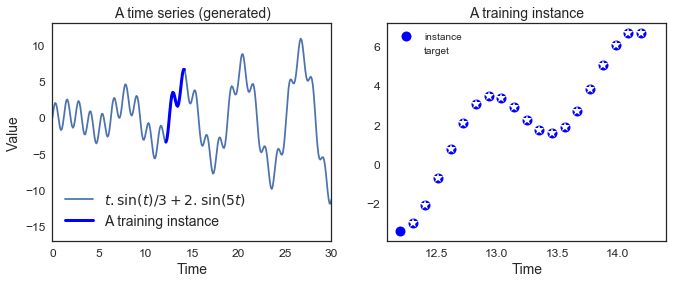

In [45]:

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

In [21]:
a = np.array([1,2,3,4,5,6])

In [23]:
a[:-1]

array([1, 2, 3, 4, 5])

In [26]:
X_batch,y_batch = next_batch(1,n_steps)

In [27]:
X_batch.shape,y_batch.shape


((1, 20, 1), (1, 20, 1))

In [29]:
np.c_[X_batch[0],y_batch[0]]

array([[ 10.67045159,  10.89868794],
       [ 10.89868794,  10.54982257],
       [ 10.54982257,   9.70249531],
       [  9.70249531,   8.53637755],
       [  8.53637755,   7.28830598],
       [  7.28830598,   6.19463222],
       [  6.19463222,   5.43390155],
       [  5.43390155,   5.08389065],
       [  5.08389065,   5.10351726],
       [  5.10351726,   5.34404244],
       [  5.34404244,   5.58681263],
       [  5.58681263,   5.59828881],
       [  5.59828881,   5.18887583],
       [  5.18887583,   4.26113262],
       [  4.26113262,   2.83554294],
       [  2.83554294,   1.04751825],
       [  1.04751825,  -0.88365297],
       [ -0.88365297,  -2.70632797],
       [ -2.70632797,  -4.19591142],
       [ -4.19591142,  -5.20761449]])

# Using an OutputProjectionWrapper

In [30]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu)
outputs,states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)



In [31]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [33]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu),
    output_size = n_outputs)

In [34]:
outputs,states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [47]:
outputs.shape

TensorShape([Dimension(None), Dimension(20), Dimension(1)])

In [35]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [36]:
saver = tf.train.Saver()

In [38]:
n_iterations = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch,y_batch = next_batch(batch_size,n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170928/my_time_series_model") # not shown in the book        
        

0 	MSE: 16.4043
100 	MSE: 0.480998
200 	MSE: 0.204728
300 	MSE: 0.0840057
400 	MSE: 0.0568985
500 	MSE: 0.0494023
600 	MSE: 0.0494862
700 	MSE: 0.0525835
800 	MSE: 0.0656873
900 	MSE: 0.0564882


In [39]:
with tf.Session() as sess:
    saver.restore(sess,'E:/python_work/handson_ml/tf_logs/run_20170928/my_time_series_model')
    X_new = time_series(np.array(t_instance[:-1].reshape(-1,n_steps,n_inputs)))
    y_pred = sess.run(outputs,feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170928/my_time_series_model


In [40]:
y_pred

array([[[-3.44793653],
        [-2.5261035 ],
        [-1.17894745],
        [ 0.64304662],
        [ 2.05250978],
        [ 3.01540709],
        [ 3.45784163],
        [ 3.30075908],
        [ 2.79322505],
        [ 2.14349818],
        [ 1.66562641],
        [ 1.48520386],
        [ 1.83009517],
        [ 2.65742183],
        [ 3.79910541],
        [ 5.04920673],
        [ 6.09021854],
        [ 6.68032217],
        [ 6.69901228],
        [ 6.07196283]]], dtype=float32)

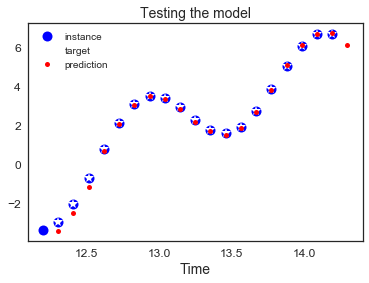

In [41]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()


# Without using an  OutputProjectionWrapper

In [48]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [49]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [51]:
rnn_outputs.shape

TensorShape([Dimension(None), Dimension(20), Dimension(100)])

In [52]:
n_outputs = 1
learning_rate = 0.001

In [53]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [54]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [55]:
n_iterations = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170928_2/my_time_series_model")

0 	MSE: 14.4271
100 	MSE: 0.57318
200 	MSE: 0.213021
300 	MSE: 0.11726
400 	MSE: 0.070781
500 	MSE: 0.0643272
600 	MSE: 0.0559673
700 	MSE: 0.0513259
800 	MSE: 0.0540262
900 	MSE: 0.0486771


In [56]:
y_pred

array([[[-3.47660804],
        [-2.53071666],
        [-1.25660014],
        [ 0.6389308 ],
        [ 2.14971232],
        [ 3.10084486],
        [ 3.47365332],
        [ 3.40289617],
        [ 2.82339501],
        [ 2.10586786],
        [ 1.63628089],
        [ 1.54614198],
        [ 1.88534868],
        [ 2.7365067 ],
        [ 3.87909079],
        [ 5.06184101],
        [ 6.06422806],
        [ 6.62886238],
        [ 6.61895609],
        [ 6.02657604]]], dtype=float32)

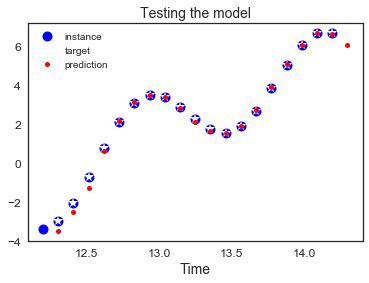

In [57]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

# Generating a creative new sequence

In [58]:
with tf.Session() as sess:
    saver.restore(sess,'E:/python_work/handson_ml/tf_logs/run_20170928_2/my_time_series_model')
    
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1,n_steps,1)
        y_pred = sess.run(outputs,feed_dict={X:X_batch})
        sequence.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170928_2/my_time_series_model


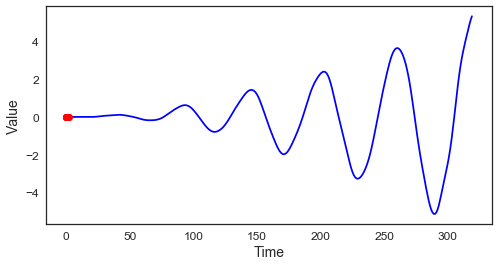

In [59]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "ro", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170928_2/my_time_series_model


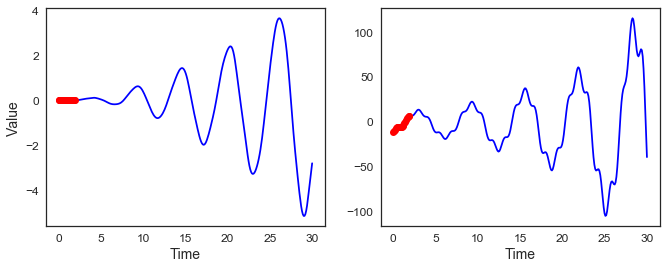

In [62]:

with tf.Session() as sess:
    saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170928_2/my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "ro", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "ro", linewidth=3)
plt.xlabel("Time")

plt.show()

# Deep RNN

In [63]:
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])


In [64]:
n_neurons = 100
n_layers = 3

layers = [
    tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
    for layer in range(n_layers)
]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs,states = tf.nn.dynamic_rnn(multi_layer_cell,X,dtype=tf.float32)

In [65]:
init = tf.global_variables_initializer()

In [66]:
X_batch = np.random.rand(2,n_steps,n_inputs)

In [67]:
with tf.Session() as sess:
    init.run()
    outputs_val,states_val = sess.run([outputs,states],feed_dict={X:X_batch})

In [68]:
outputs_val.shape

(2, 5, 100)

# Distributing a Deep RNN Across Multiple GPUs

In [87]:
import tensorflow as tf

class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
    def __init__(self,device,cell):
        self._cell = cell
        self._device = device
     
    @property
    def state_size(self):
        return self._cell.state_size
    
    @property
    def output_size(self):
        return self._cell.output_size
    
    def __call__(self,inputs,state,scope=None):
        with tf.device(self._device):
            return self._cell(inputs,state,scope)

In [88]:
reset_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.placeholder(tf.float32,shape=[None,n_steps,n_inputs])

In [89]:
devices = ["/cpu:0", "/cpu:0", "/cpu:0"] # replace with ["/gpu:0", "/gpu:1", "/gpu:2"] if you have 3 GPUs
cells = [DeviceCellWrapper(dev,tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))
         for dev in devices]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [90]:
init  = tf.global_variables_initializer()

In [91]:
with tf.Session() as sess:
    init.run()
    print(sess.run(outputs,feed_dict={X:np.random.rand(2,n_steps,n_inputs)}))

[[[-0.08663084 -0.0929317  -0.09448218 ...,  0.07095756  0.03947859
   -0.0223582 ]
  [-0.00272523 -0.34017661  0.05924866 ..., -0.06484335  0.113869
    0.1355288 ]
  [ 0.02946341 -0.24840435  0.05619801 ..., -0.16343941  0.04593967
    0.129195  ]
  ..., 
  [ 0.05272572 -0.53788346  0.48113257 ..., -0.06051829 -0.07264125
    0.468768  ]
  [-0.50525427 -0.76852441  0.45592368 ...,  0.01245521  0.11499207
    0.62669986]
  [ 0.03964036 -0.7981301   0.6590758  ..., -0.25132325  0.11016278
    0.48127082]]

 [[-0.1513125  -0.08667991  0.00700863 ...,  0.07468764 -0.0023026
   -0.04307155]
  [ 0.07644141 -0.29120383 -0.03115539 ..., -0.07067543  0.06400656
    0.08548108]
  [-0.04945162 -0.19338506  0.10298084 ...,  0.02510141 -0.02033011
    0.1503721 ]
  ..., 
  [-0.31397206 -0.74376661  0.4937177  ...,  0.06411301  0.28450167
    0.34879085]
  [ 0.18476257 -0.74396408  0.32966781 ..., -0.33429959 -0.28992158
    0.40368894]
  [-0.09950478 -0.60919178  0.55980897 ...,  0.04178806  0.13

# Dropout

In [102]:
reset_graph()

n_inputs =1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1


import sys

#training = (sys.argv[-1]=='train')
training = True
X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

In [103]:
keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
        for layer in range(n_layers)]
if training:
    cells = [tf.contrib.rnn.DropoutWrapper(cell,input_keep_prob=keep_prob)
             for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs,states = tf.nn.dynamic_rnn(multi_layer_cell,X,dtype=tf.float32)

In [104]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs,[-1,n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs,n_outputs)
outputs = tf.reshape(stacked_outputs,[-1,n_steps,n_outputs])

loss = tf.reduce_mean(tf.square(outputs-y))
opotimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init= tf.global_variables_initializer()
saver = tf.train.Saver()

In [110]:
with tf.Session() as sess:
    if training:
        init.run()
        for iteration in range(n_iterations):
            X_batch,y_batch = next_batch(batch_size,n_steps)
            _,mse = sess.run([training_op,loss],feed_dict={X:X_batch,y:y_batch})
            if iteration %100 ==0:
                
                print(iteration,'Training MSE:',mse)
        save_path = saver.save(sess,'E:/python_work/handson_ml/tf_logs/run_20170928_3/my_model.ckpt')
    else:
        saver.restore(sess,'E:/python_work/handson_ml/tf_logs/run_20170928_3/my_model.ckpt')
        X_new = time_series(np.array(t_instance[:-1].reshape(-1,n_steps,n_inputs)))
        y_pred = sess.run(outputs,feed_dict={X:X_new})
                

0 Training MSE: 17.0831
100 Training MSE: 7.18554
200 Training MSE: 4.15917
300 Training MSE: 3.87956
400 Training MSE: 3.7664
500 Training MSE: 3.01117
600 Training MSE: 3.06422
700 Training MSE: 3.37477
800 Training MSE: 2.93563
900 Training MSE: 2.47207


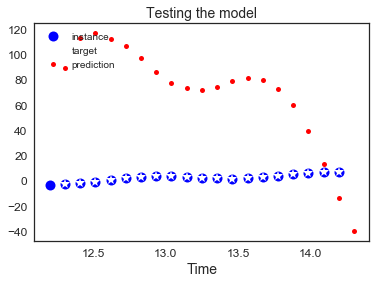

In [111]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [109]:
np.square(y_pred-y)

<tf.Tensor 'mul:0' shape=(?, 20, 1) dtype=float32>

In [114]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


n_iterations = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
    
    saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170928_4/my_dropout_time_series_model")

0 Training MSE: 15.1829
100 Training MSE: 4.39361
200 Training MSE: 4.84622
300 Training MSE: 3.56991
400 Training MSE: 3.54681
500 Training MSE: 3.66859
600 Training MSE: 3.94647
700 Training MSE: 3.4409
800 Training MSE: 3.12431
900 Training MSE: 4.17584


In [115]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170928_4/my_dropout_time_series_model


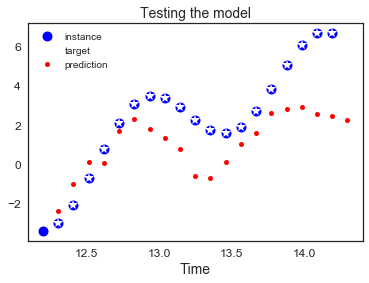

In [116]:
with tf.Session() as sess:
    saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170928_4/my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

# LSTM


In [117]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

In [118]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.int32,[None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
             for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs,states = tf.nn.dynamic_rnn(multi_cell,X,dtype=tf.float32)
top_layer_h_state = states[-1][1]

logits = tf.layers.dense(top_layer_h_state,n_outputs,name='softmax')
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)

loss = tf.reduce_mean(xentropy,name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits,y,1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()

In [119]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_2:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>))

In [120]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>

In [122]:
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

KeyboardInterrupt: 

In [125]:
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons,use_peepholes=True)

In [126]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

# Embeddings

## Fetch the data

In [127]:
import urllib

import errno
import os
import zipfile

In [128]:
WORDS_PATH = 'E:/python_work/handson_ml/datasets/words'
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

#def mkdir_p(path):
#    os.makedirs(path,exist_ok=True)
    
def fetch_words_data(words_url=WORDS_URL,words_path=WORDS_PATH):
    os.makedirs(words_path,exist_ok=True)
    zip_path = os.path.join(words_path,'words.zip')
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url,zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode('ascii').split()

        

In [129]:
words = fetch_words_data()

In [130]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

## Build the dictionary

In [134]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [('UNK',None)] + Counter(words).most_common(vocabulary_size-1)
vocabulary = np.array([word for word,_ in vocabulary])
dictionary = {word:code for code,word in enumerate(vocabulary)}
data = np.array([dictionary.get(word,0) for word in words])


In [135]:
' '.join(words[:9]),data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [136]:
' '.join([vocabulary[word_index] for word_index in [5234, 3081,   12,    6,  195,    2, 3134,   46,   59]])

'anarchism originated as a term of abuse first used'

In [138]:
words[24],data[24]

('culottes', 0)

##  Generate batches

In [139]:
import random
from collections import deque

def generate_batch(batch_size,num_skips,skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2* skip_window
    batch = np.ndarray(shape=(batch_size),dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels    


In [140]:
data_index = 0
batch,labels = generate_batch(8,2,1)

In [141]:
batch,[vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195]),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [144]:
labels,[vocabulary[word] for word in labels[:,0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [ 195],
        [  12],
        [   2],
        [   6]]),
 ['as', 'anarchism', 'a', 'originated', 'term', 'as', 'of', 'a'])

## Build the model

In [145]:
bathc_size = 128
embedding_size = 128
skip_window = 1
num_skips = 2

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [146]:
reset_graph()

train_labels = tf.placeholder(tf.int32,shape=[batch_size,1])
valid_dataset = tf.constant(valid_examples,dtype=tf.int32)

In [147]:
vocabulary_size = 50000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [148]:
train_inputs = tf.placeholder(tf.int32,shape=[None])
embed = tf.nn.embedding_lookup(embeddings,train_inputs)

In [149]:

# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

## Train the model

In [150]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  285.549072266
Nearest to this: asia, growths, contracting, ammianus, shays, carats, put, soriano,
Nearest to has: camelopardalis, lessen, learning, ji, duddy, demonology, unabomber, semipalatinsk,
Nearest to no: engrams, maya, kilda, relevance, inverted, abiding, baz, sanctuary,
Nearest to there: glamorgan, ecusa, fenway, families, moko, pumping, useless, convert,
Nearest to when: cosa, truce, mammary, klan, verisimilitude, elaborate, jacketed, frontispiece,
Nearest to that: secretions, pron, emmy, disputed, sibling, wo, banned, agora,
Nearest to on: thatched, falsely, wi, vinegar, euskal, consequentialist, baroness, tallinn,
Nearest to often: presses, convenience, arabidopsis, jewry, mapuche, guts, macrinus, implemented,
Nearest to be: hurry, etymologically, diagnostics, jaco, linked, postcards, judgements, underestimate,
Nearest to s: drang, volleys, stacking, hypomanic, sash, kenneth, deutschland, iau,
Nearest to some: reduced, isaacs, gdr, ph

In [156]:

np.save("E:/python_work/handson_ml/tf_logs/run_20170928_5/my_final_embeddings.npy", final_embeddings)

## Plot the embeddings

In [157]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

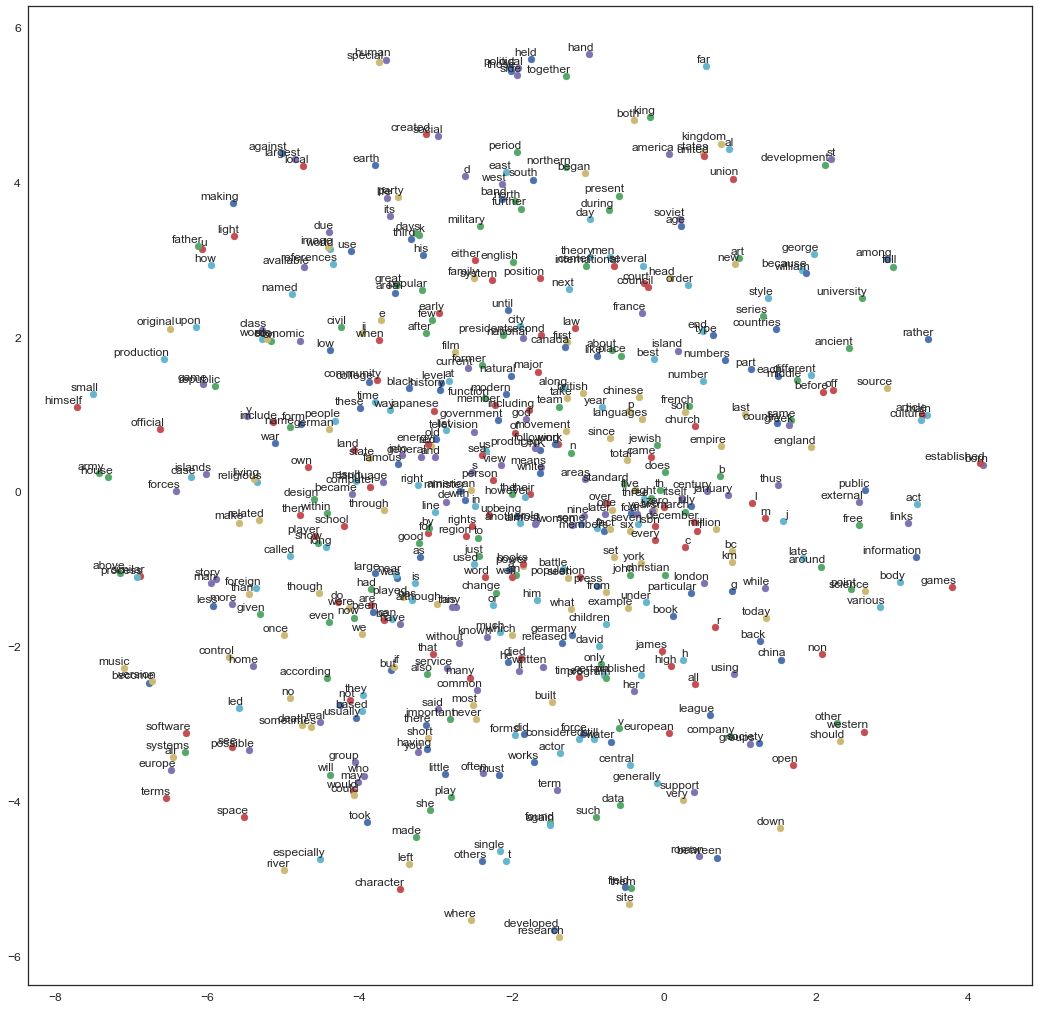

In [158]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## Machine  Translation

In [159]:

import tensorflow as tf
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

In [160]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

KeyboardInterrupt: 

# Exercise

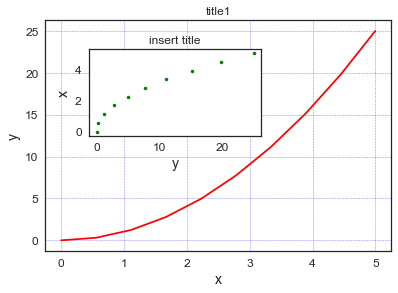

In [162]:
x= np.linspace(0,5,10)
y = x ** 2
fig = plt.figure()

axes1 = fig.add_axes([0.1,.1,.8,.8])
axes2 = fig.add_axes([.2,.5,.4,.3])

axes1.plot(x,y,'r-')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title1')
axes1.grid(color='b',alpha=0.5,ls='dashed',lw=0.5)
axes2.plot(y,x,'g.')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

In [165]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

alpha = 0.7
phi_ext = 2 * np.pi * 0.5
def flux(phi_m,phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos((phi_ext - 2 * phi_p))

phi_m = np.linspace(0,2*np.pi,100)
phi_p = np.linspace(0,2*np.pi,100)
X,Y = np.meshgrid(phi_p,phi_m)
Z = flux(X,Y).T

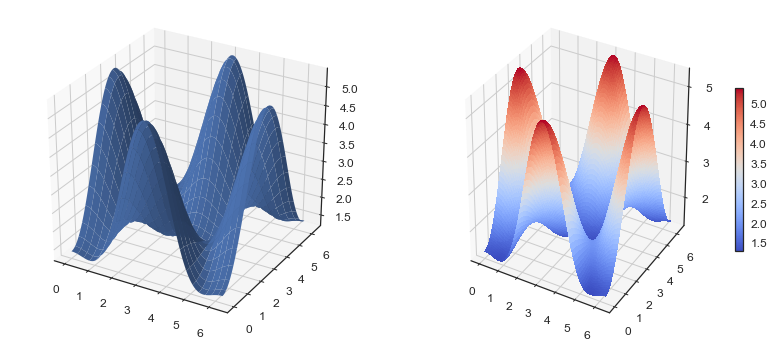

In [167]:
fig = plt.figure(figsize=(14,6)
                )
ax = fig.add_subplot(1,2,1,projection='3d')
p = ax.plot_surface(X,Y,Z,rstride=4,cstride=4,lw=0)
ax = fig.add_subplot(1,2,2,projection='3d')
p = ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=matplotlib.cm.coolwarm,lw=0,antialiased=False)
cb = fig.colorbar(p,shrink=0.5)